In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from Set_up_for_performing import  perform_model, print_grid_search_attributes, plot_confusion_matrix

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import glob

# Define all expected labels
all_labels = {
    'walking', 'sitting', 'standing', 'standing_hosehold_chores',
    'lying', 'cycling', 'vacuum_cleaning', 'walkingStairsUp', 'jumping'
}

# Scan each file
user_label_coverage = {}

for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    labels = set(df['label'].unique())
    user = file.split('.')[0].upper()

    user_label_coverage[user] = labels
    print(f"{user}: {labels}")

# Identify users with full label coverage
print("\nUsers with full label coverage:")
for user, labels in user_label_coverage.items():
    if all_labels.issubset(labels):
        print(f"- {user}")

# Optionally: users missing labels
print("\nUsers missing any labels:")
for user, labels in user_label_coverage.items():
    missing = all_labels - labels
    if missing:
        print(f"{user} is missing: {missing}")


P1: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P16: {'sitting', 'walking', 'standing'}
P2: {'sitting', 'cycling', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P20: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P21: {'sitting', 'cycling', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P25: {'sitting', 'cycling', 'lying', 'standing_hosehold_chores', 'standing', 'walking', 'walkingStairsUp'}
P29: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P3: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P30: {'standing_hosehold_chores', 'sitting', 'walking', 'standing'}
P32: {'sitting', 'cycling', 'lying', 'standing', 'walking'}
P38: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P4: {'standing_hosehold_chores', 'sitting', 'walking', 'standing'}
P45: {'sitting', 'lying', 'standing_hosehold_chores', 'standing', 'walking'}
P47: {'sitting', 'cycli

Need to select the users that wil be in train and test. This works for the splits young and old as well as the gender splits

In [5]:
import pandas as pd
import glob
import os

# Define file names based on gender split
female_files = [
    "P7.0.csv",  "P30.0.csv","P29.0.csv", "P4.0.csv", "P58.0.csv", "P81.0.csv"


]

male_files = [
    "P16.0.csv", "P20.0.csv", "P88.0.csv",
    "P6.0.csv", "P38.0.csv", "P47.0.csv"
]
train_2 = [
    "P25.0.csv", "P45.0.csv", "P1.0.csv" "P63.0.csv"
]
# Get all CSV files in the current working directory
all_files = glob.glob("*.csv")

# Separate into train and test
train_dfs = []
test_dfs = []
train_2_dfs = []
for file_path in all_files:
    filename = os.path.basename(file_path)

    if filename in male_files:
        print(f"Train (Male): {filename}")
        train_dfs.append(pd.read_csv(file_path))
    elif filename in female_files:
        print(f"Test (Female): {filename}")
        test_dfs.append(pd.read_csv(file_path))
    elif filename in train_2:
        print(f"Test (Female): {filename}")
        train_2_dfs.append(pd.read_csv(file_path))
    else:
        print(f"Skipped: {filename}")

# Combine the datasets
train_data = pd.concat(train_dfs, ignore_index=True)
test_data = pd.concat(test_dfs, ignore_index=True)
train_2 = pd.concat(train_2_dfs, ignore_index=True)
# Print final shape
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Skipped: P1.0.csv
Train (Male): P16.0.csv
Skipped: P2.0.csv
Train (Male): P20.0.csv
Skipped: P21.0.csv
Test (Female): P25.0.csv
Test (Female): P29.0.csv
Skipped: P3.0.csv
Test (Female): P30.0.csv
Skipped: P32.0.csv
Train (Male): P38.0.csv
Test (Female): P4.0.csv
Test (Female): P45.0.csv
Train (Male): P47.0.csv
Test (Female): P58.0.csv
Train (Male): P6.0.csv
Skipped: P63.0.csv
Test (Female): P7.0.csv
Test (Female): P81.0.csv
Train (Male): P88.0.csv
Skipped: PAMAP.csv
Skipped: test_data.csv
Skipped: train_data.csv
Train shape: (44433, 42)
Test shape: (48334, 42)


In [10]:
# --- Drop 'walkingStairsUp' from both train and test ---
train_data = train_data[train_data['label'] != 'walkingStairsUp']
test_data = test_data[test_data['label'] != 'walkingStairsUp']
train_2 = train_2[train_2['label'] != 'walkingStairsUp']
# --- Verify updated label counts ---
print("\nLabel counts in updated train set:\n", train_data['label'].value_counts())
print("\nLabel counts in updated test set:\n", test_data['label'].value_counts())



Label counts in updated train set:
 label
sitting                     9996
walking                     9996
standing                    8985
standing_hosehold_chores    7128
lying                       6662
cycling                     1666
Name: count, dtype: int64

Label counts in updated test set:
 label
sitting                     10000
standing                    10000
standing_hosehold_chores    10000
walking                     10000
lying                        5000
cycling                      3334
Name: count, dtype: int64


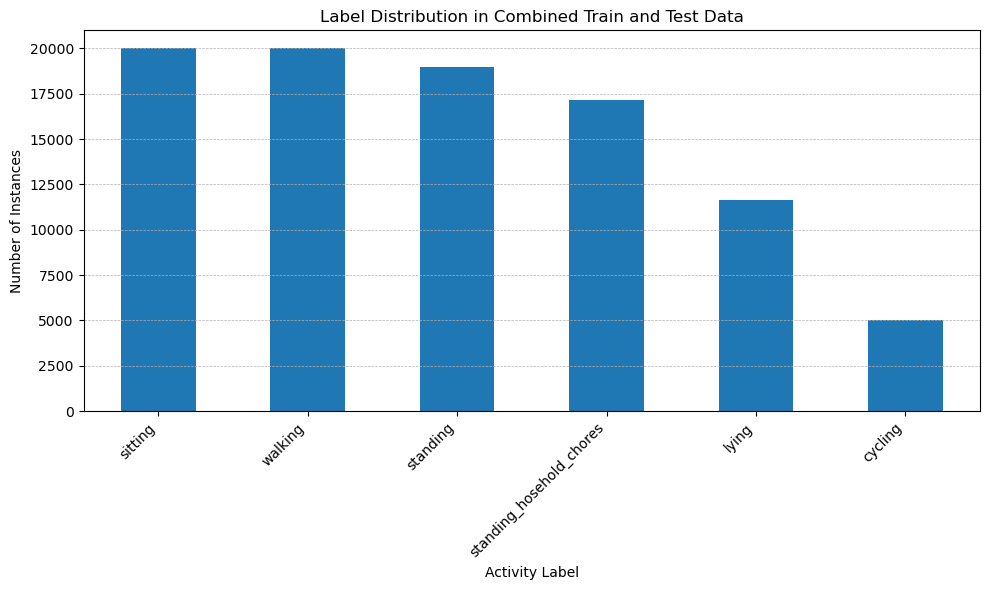

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Combine datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Count label occurrences
label_counts = combined_data['label'].value_counts().sort_values(ascending=False)

# Plot the label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution in Combined Train and Test Data')
plt.xlabel('Activity Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [14]:
print("train2 shape:", train_data.shape)
print("Unique labels in train_2:", train_data['label'].unique())

train2 shape: (44433, 42)
Unique labels in train_2: ['sitting' 'standing' 'walking' 'lying' 'standing_hosehold_chores'
 'cycling']


In [16]:
print("train2 shape:", test_data.shape)
print("Unique labels in train_2:", test_data['label'].unique())

train2 shape: (48334, 42)
Unique labels in train_2: ['lying' 'sitting' 'standing' 'standing_hosehold_chores' 'walking'
 'cycling']


In [18]:
print("Original label counts in train:\n", train_data['label'].value_counts())
print("\nOriginal label counts in test:\n", test_data['label'].value_counts())
print("\nOriginal label counts in train_2:\n", train_2['label'].value_counts())

Original label counts in train:
 label
sitting                     9996
walking                     9996
standing                    8985
standing_hosehold_chores    7128
lying                       6662
cycling                     1666
Name: count, dtype: int64

Original label counts in test:
 label
sitting                     10000
standing                    10000
standing_hosehold_chores    10000
walking                     10000
lying                        5000
cycling                      3334
Name: count, dtype: int64

Original label counts in train_2:
 label
lying                       3334
sitting                     3333
standing                    3333
standing_hosehold_chores    3333
walking                     3333
cycling                     1667
Name: count, dtype: int64


In [20]:
train = train_data

In [22]:
test = test_data
train_2 = train_2

In [24]:
# get X_train and y_train from csv files
X_train = train.drop(['user_id', 'label'], axis=1)
y_train = train.label

In [26]:

# get X_test and y_test from test csv file
X_test = train.drop(['user_id', 'label'], axis=1)
y_test = test.label
X_train2 = train_2.drop(['user_id', 'label'], axis=1)
y_train2 = train_2.label

In [28]:
from re import X
# Separate features and labels for training data
X_train = train.drop(columns=['label'])  # Drop the label column to get features
y_train = train['label']  # Select only the label column for targets

# Separate features and labels for testing data
X_test = test.drop(columns=['label'])  # Drop the label column to get features
y_test = test['label']  # Select only the label column for targets

X_train2 = train_2.drop(columns=['label'])  # Drop the label column to get features
y_train2 = train_2['label']  # Select only the label column for targets
# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_train2 shape: {X_train2.shape}")
print(f"y_train2 shape: {y_train2.shape}")

X_train shape: (44433, 41)
y_train shape: (44433,)
X_test shape: (48334, 41)
y_test shape: (48334,)
X_train2 shape: (18333, 41)
y_train2 shape: (18333,)


In [30]:
# Check for NaNs in training and test sets
print("\nNaNs in X_train:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

print("\nNaNs in X_test:")
print(X_test.isna().sum()[X_test.isna().sum() > 0])

print("\nNaNs in y_train:")
print(y_train.isna().sum())

print("\nNaNs in y_test:")
print(y_test.isna().sum())


NaNs in X_train:
Ax_skewness     448
Ax_kurtosis     448
Ay_skewness    1322
Ay_kurtosis    1322
Az_skewness     265
Az_kurtosis     265
dtype: int64

NaNs in X_test:
Ax_skewness    177
Ax_kurtosis    177
Ay_skewness    503
Ay_kurtosis    503
Az_skewness      8
Az_kurtosis      8
dtype: int64

NaNs in y_train:
0

NaNs in y_test:
0


In [32]:
# Drop rows with NaNs from both train and test sets
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Make sure y matches X

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

X_train2 = X_train2.dropna()
y_train2 = y_train2.loc[X_train2.index]

In [34]:
label = np.unique(y_test).tolist()


## 1. Logistic regression



Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done

Training time (HH:MM:SS.ms): 0:00:48.474465

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.018016

---------------------
|      Accuracy      |
---------------------

    0.7018615290981972

--------------------
| Confusion Matrix |
--------------------

 [[2984  284   66    0    0    0]
 [   6   13 4416    0    4    0]
 [   0    1 8512 1306   80    0]
 [   0    0 1791 7819  369    0]
 [   0    0    6 5875 4116    2]
 [   0    0    0    0    0 9999]]


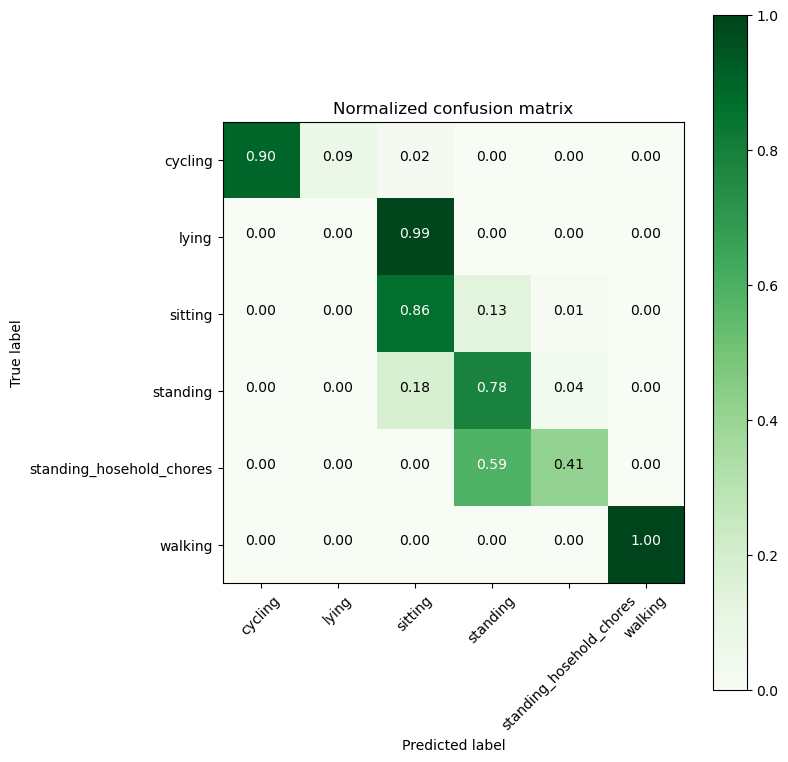

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       1.00      0.90      0.94      3334
                   lying       0.04      0.00      0.01      4439
                 sitting       0.58      0.86      0.69      9899
                standing       0.52      0.78      0.63      9979
standing_hosehold_chores       0.90      0.41      0.57      9999
                 walking       1.00      1.00      1.00      9999

                accuracy                           0.70     47649
               macro avg       0.67      0.66      0.64     47649
            weighted avg       0.70      0.70      0.67     47649

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=20, penalty='l1', solver='liblinear')

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	

In [39]:


# Set up Grid Search for Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=label)
print_grid_search_attributes(log_reg_grid)


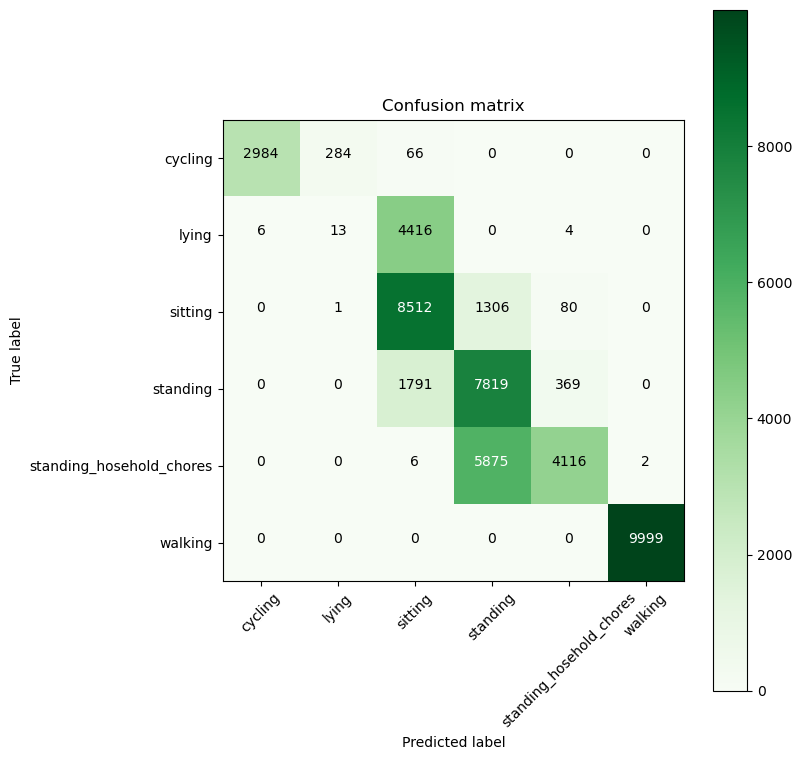

In [40]:

# plot confusion matrix
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred_updated))

### Post train logreg


In [45]:
# Combine the original and new training data
X_combined = np.concatenate((X_train, X_train2), axis=0)
y_combined = np.concatenate((y_train, y_train2), axis=0)

# Re-train the model on the combined dataset
log_reg_grid.fit(X_combined, y_combined)

# Evaluate
y_pred_updated = log_reg_grid.predict(X_test)
accuracy_updated = accuracy_score(y_test, y_pred_updated)
print("Accuracy after re-training on combined data:", accuracy_updated)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy after re-training on combined data: 0.7234989191798359


C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


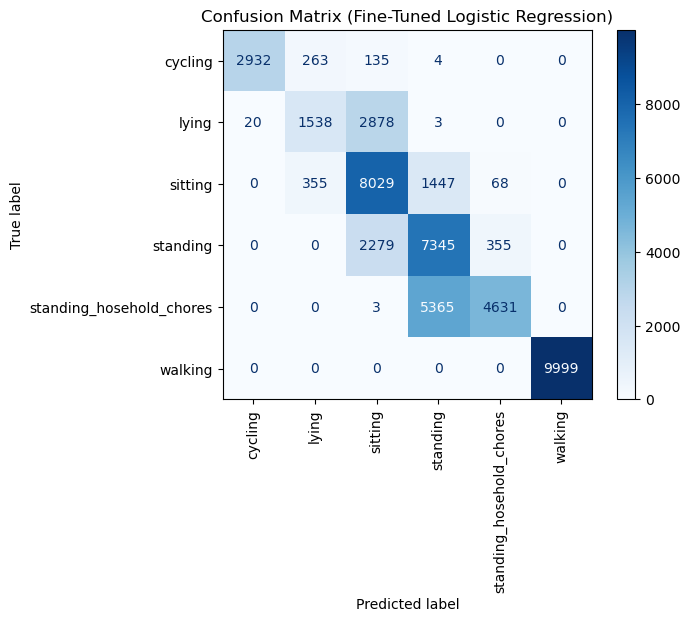

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Print Confusion Matrix
cm_updated = confusion_matrix(y_test, y_pred_updated)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_updated, display_labels=log_reg_grid.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix (Fine-Tuned Logistic Regression)")
plt.show()


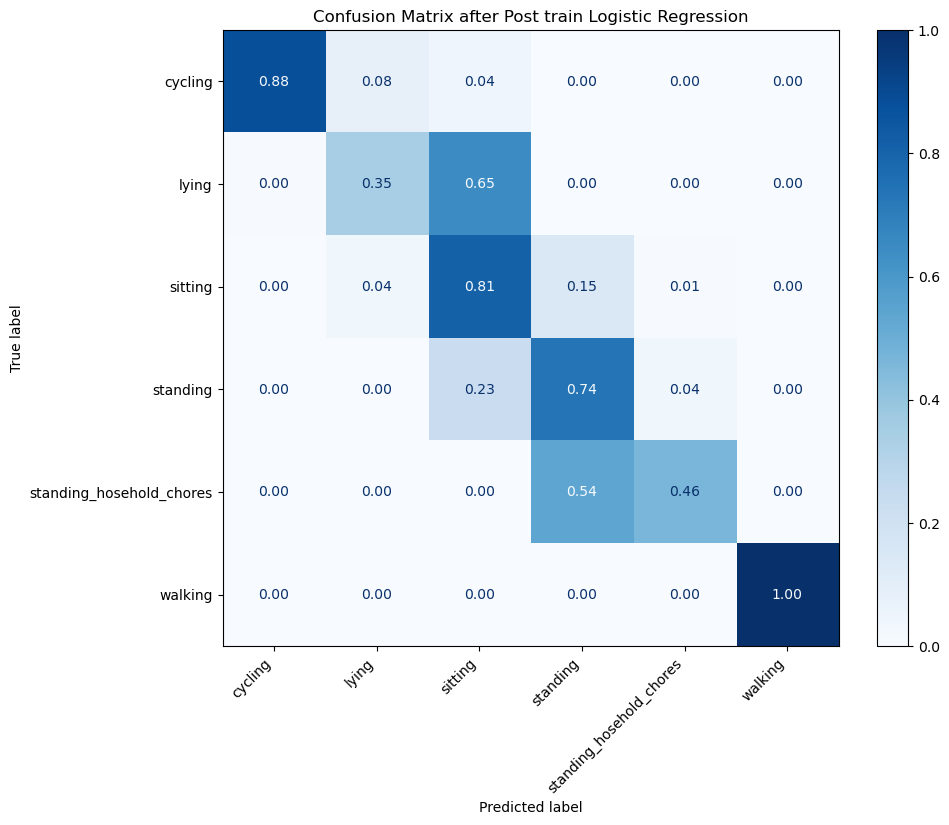

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_updated, normalize='true')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_reg.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax, values_format=".2f")
plt.title("Confusion Matrix after Post train Logistic Regression")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [74]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred_updated))


                          precision    recall  f1-score   support

                 cycling       0.99      0.88      0.93      3334
                   lying       0.71      0.35      0.47      4439
                 sitting       0.60      0.81      0.69      9899
                standing       0.52      0.74      0.61      9979
standing_hosehold_chores       0.92      0.46      0.62      9999
                 walking       1.00      1.00      1.00      9999

                accuracy                           0.72     47649
               macro avg       0.79      0.71      0.72     47649
            weighted avg       0.77      0.72      0.72     47649



## 2. Random Forest Classifier

Training the model...
Done

Training time (HH:MM:SS.ms): 0:07:54.508791

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.248774

---------------------
|      Accuracy      |
---------------------

    0.8616760057923566

--------------------
| Confusion Matrix |
--------------------

 [[2567  117  650    0    0    0]
 [ 114  905 3416    4    0    0]
 [   0    0 9282  617    0    0]
 [   0    0  273 9702    4    0]
 [   0    0   47 1273 8603   76]
 [   0    0    0    0    0 9999]]


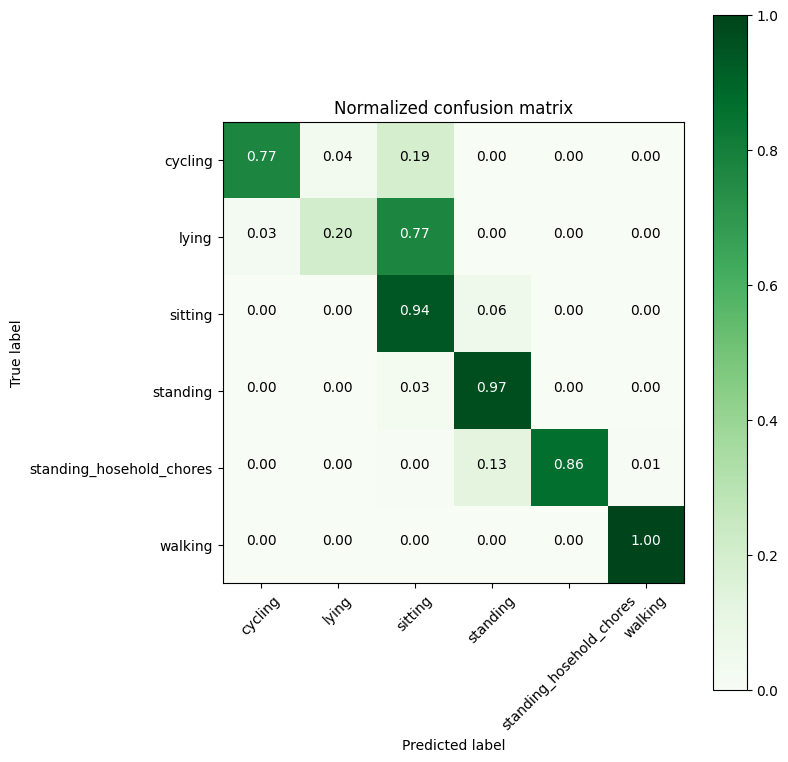

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       0.96      0.77      0.85      3334
                   lying       0.89      0.20      0.33      4439
                 sitting       0.68      0.94      0.79      9899
                standing       0.84      0.97      0.90      9979
standing_hosehold_chores       1.00      0.86      0.92      9999
                 walking       0.99      1.00      1.00      9999

                accuracy                           0.86     47649
               macro avg       0.89      0.79      0.80     47649
            weighted avg       0.88      0.86      0.85     47649



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Perform RF on the datset
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=label)

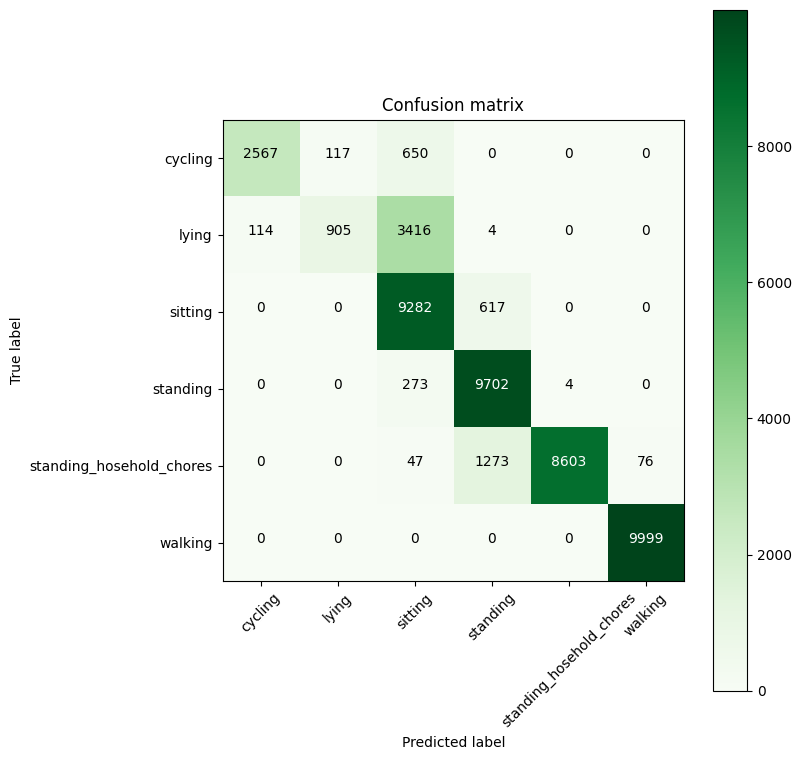

In [ ]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()

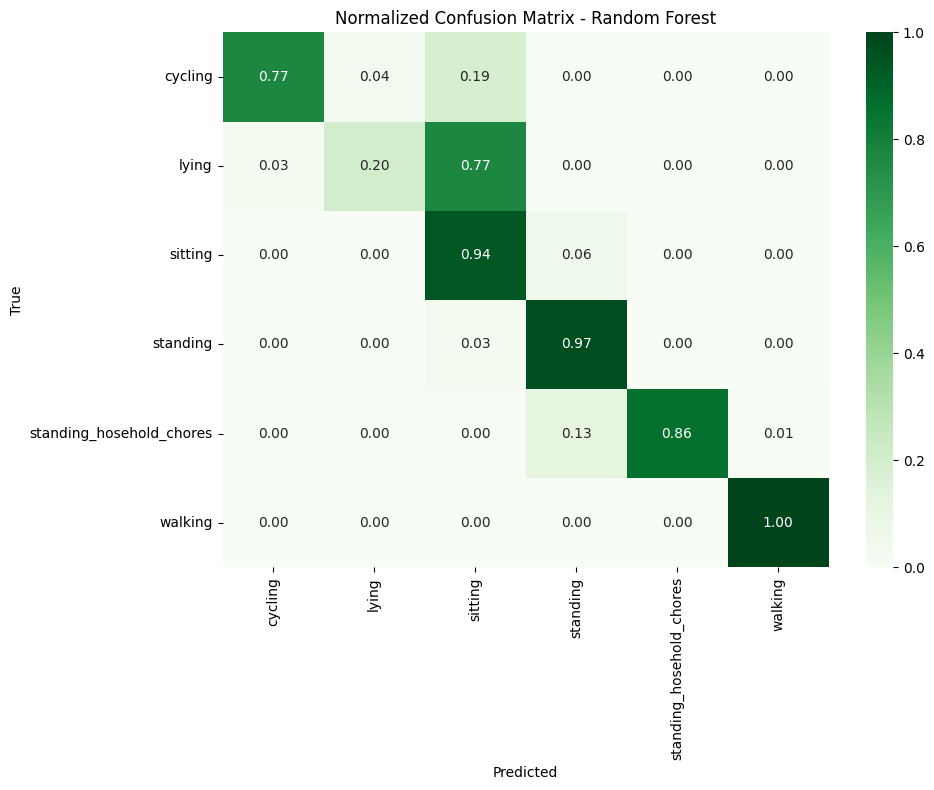

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred = rfc_grid.predict(X_test)
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=label)

# Normalize (row-wise) to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot 
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Greens', fmt='.2f',
            xticklabels=label, yticklabels=label)
plt.title("Normalized Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()

#  Save 
plt.savefig("rf_cm_YonO.png", dpi=300)
plt.show()

# Optional: download from Colab
from google.colab import files
files.download("rf_cm_YonO.png")


In [ ]:
print(np.unique(y_test))
print(label)


['cycling' 'lying' 'sitting' 'standing' 'standing_hosehold_chores'
 'walking']
['cycling', 'lying', 'sitting', 'standing', 'standing_hosehold_chores', 'walking']


In [ ]:
#sort labels 
label = sorted(np.unique(y_test))


Some of the models have been run in colab to download the png files of confusion matrix as well as the classification reports

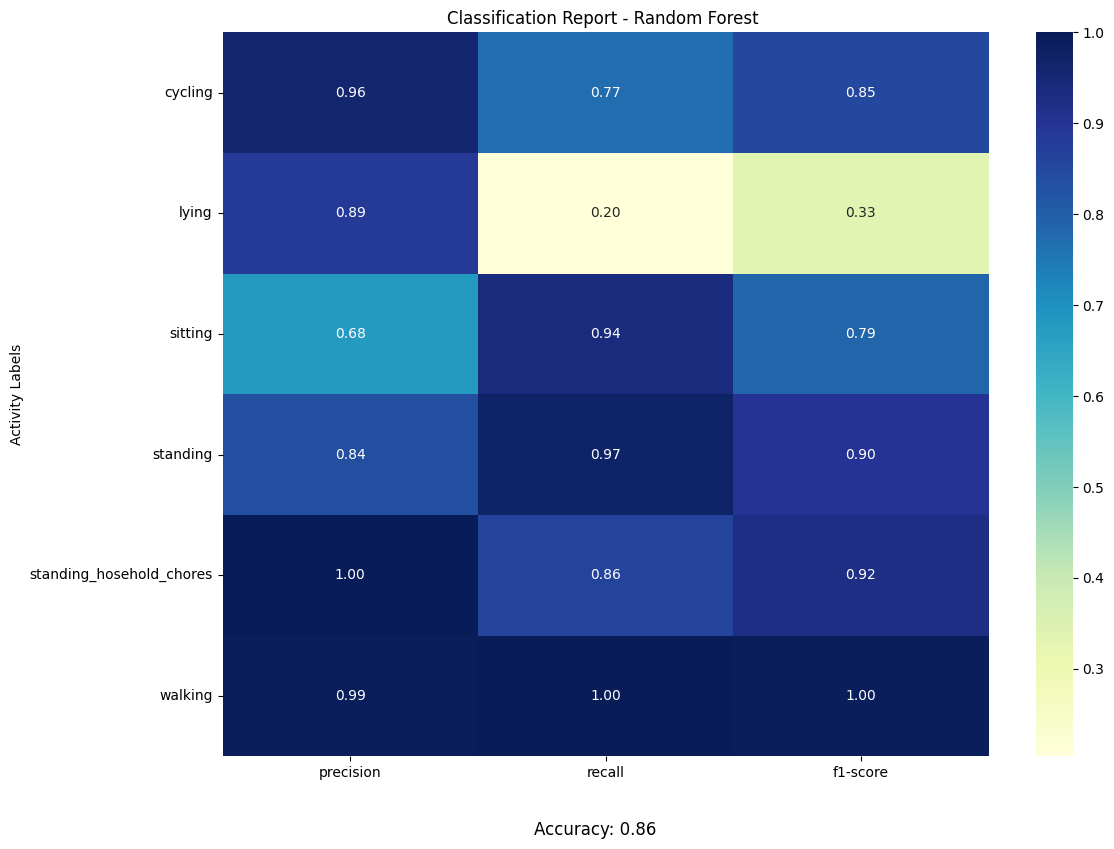

Accuracy: 0.8617


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  Predict with best estimator from grid search
best_rfc = rfc_grid.best_estimator_
y_pred = best_rfc.predict(X_test)

#  Generate classification report dictionary 
report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=label)

#  Convert to DataFrame 
report_df = pd.DataFrame(report_dict).transpose()

# Optional: Remove average rows for a cleaner class-only plot 
report_df_classes = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

#  Plot the heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(report_df_classes.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report - Random Forest ")
plt.ylabel("Activity Labels")
plt.yticks(rotation=0)

#  Display accuracy on the figure 
accuracy = report_dict["accuracy"]
plt.figtext(0.5, -0.05, f"Accuracy: {accuracy:.2f}", ha="center", fontsize=12)

plt.tight_layout()

#  Save the figure as PNG 
plt.savefig("rf_cr_YonO.png", dpi=300, bbox_inches='tight')
plt.show()

#  Print accuracy in console 
print(f"Accuracy: {accuracy:.4f}")

#  Optional: Download from Colab
from google.colab import files
files.download("rf_cr_YonO.png")


In [ ]:

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 70.2%      29.8%
Random Forest       : 86.17%       13.83% 


## Post-train RF

In [ ]:
# Extract the best estimator from grid search
best_rfc = rfc_grid.best_estimator_

# If warm_start wasn't set initially, ensure it is enabled now:
best_rfc.set_params(warm_start=True)

# Increase n_estimators to add new trees 
best_rfc.n_estimators += 300

# Fine-tune on additional training data
best_rfc.fit(X_train2, y_train2)

# Evaluate the fine-tuned model on the original test data
y_pred_updated = best_rfc.predict(X_test)
accuracy_updated = accuracy_score(y_test, y_pred_updated)
print("Updated Accuracy:", accuracy_updated)

Updated Accuracy: 0.9141849776490587


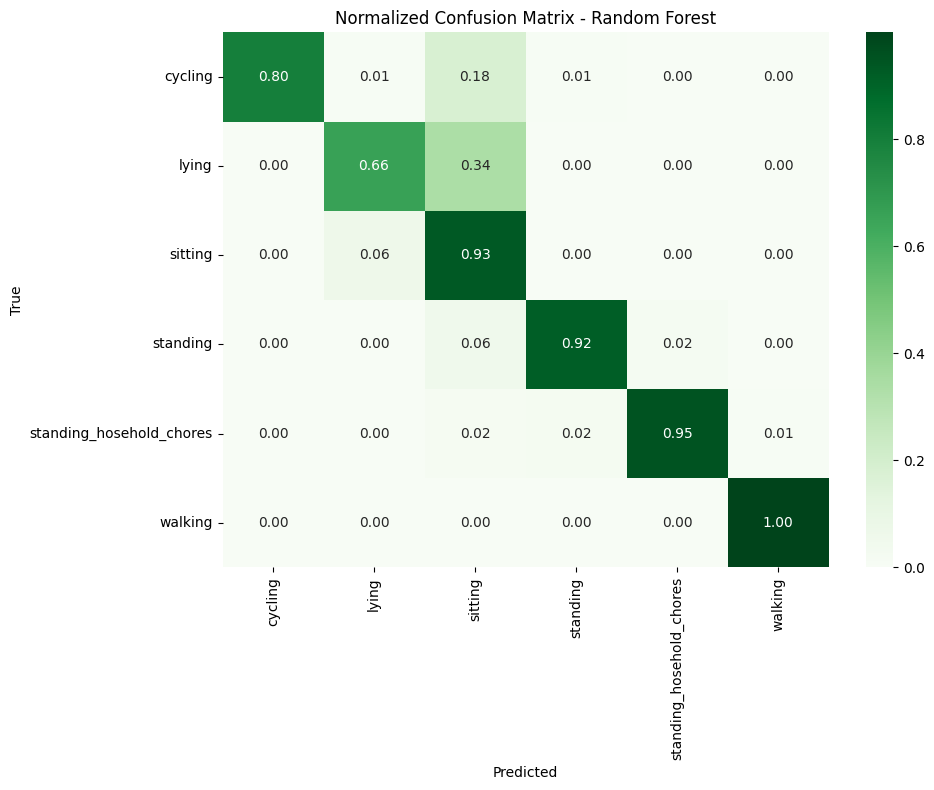

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_updated = best_rfc.predict(X_test)
# --- Compute Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_updated, labels=label)

# --- Normalize (row-wise) to get percentages ---
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# --- Plot ---
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Greens', fmt='.2f',
            xticklabels=label, yticklabels=label)
plt.title("Normalized Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()

# --- Save ---
plt.savefig("rf_post_cm_YonO.png", dpi=300)
plt.show()

# Optional: download from Colab
from google.colab import files
files.download("rf_post_cm_YonO.png")


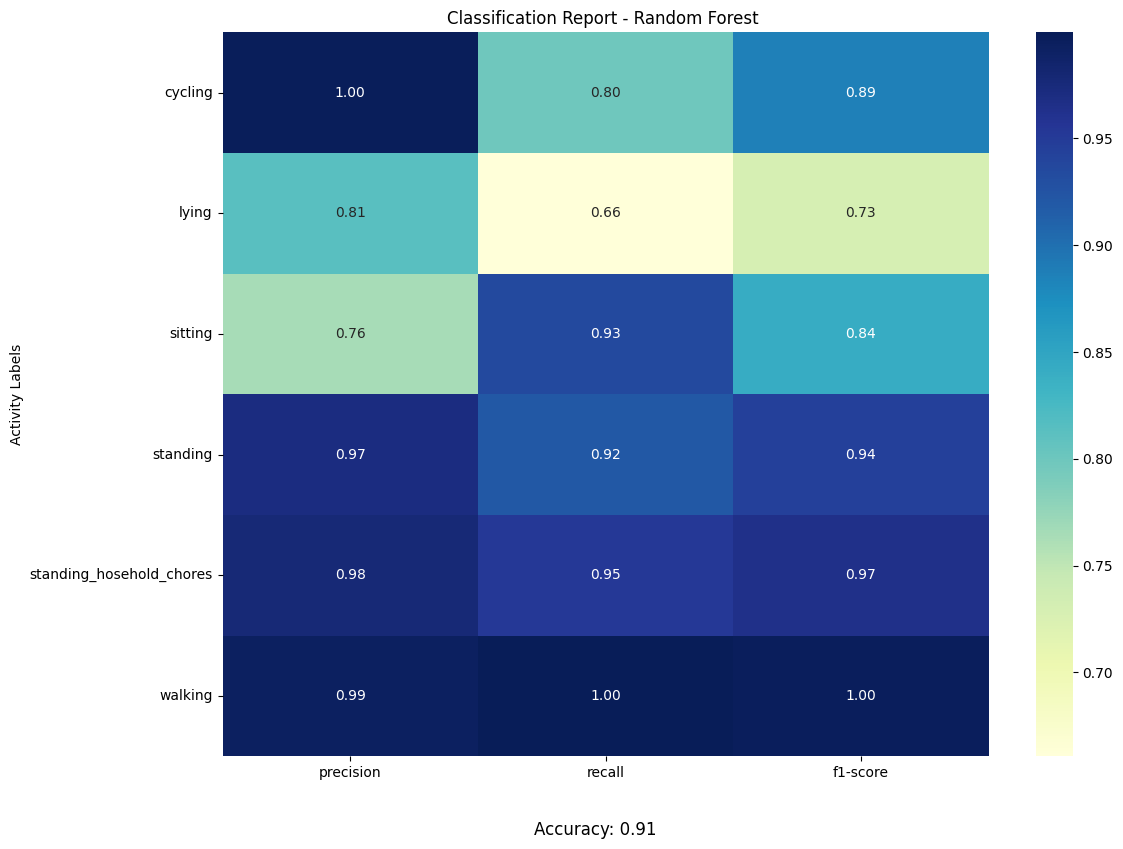

Accuracy: 0.9142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred_updated = best_rfc.predict(X_test)

report_dict = classification_report(y_test, y_pred_updated, output_dict=True, target_names=label)

report_df = pd.DataFrame(report_dict).transpose()

report_df_classes = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(report_df_classes.iloc[:, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report - Random Forest ")
plt.ylabel("Activity Labels")
plt.yticks(rotation=0)

accuracy = report_dict["accuracy"]
plt.figtext(0.5, -0.05, f"Accuracy: {accuracy:.2f}", ha="center", fontsize=12)

plt.tight_layout()

plt.savefig("rf_post_cr_YonO.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Accuracy: {accuracy:.4f}")

from google.colab import files
files.download("rf_post_cr_YonO.png")
